## Methodology: Evaluating Job and Skill Pay for Data Analysts

    1-Assess the median salary for the top 6 data analyst positions.
    2-Determine the median salary associated with each skill for data analysts.
    3-Visualize the highest-paying skills and the most in-demand skills to compare their compensation and demand.

## Import Libraries and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from datasets import load_dataset
import seaborn as sns
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

import ast
def string(list_word):
  if pd.notna(list_word):
    return ast.literal_eval(list_word)
df['job_skills'] = df['job_skills'].apply(string)

C:\Users\asus\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



## Salary Distribution by Job Title

Filter our data to only include salary values from the United States.


In [3]:
df_US = df[df['job_country'] == "United States"].dropna(subset = "salary_year_avg")

Generate a list of the primary job titles in our dataset and filter the DataFrame to include only entries with these job titles.

In [7]:
job_titles = df_US["job_title_short"].value_counts().index[0:6].to_list()
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [11]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending =  False).index



## Plot Salary Distributions

Plot the top 6 job titles salary distributions using a box plot.


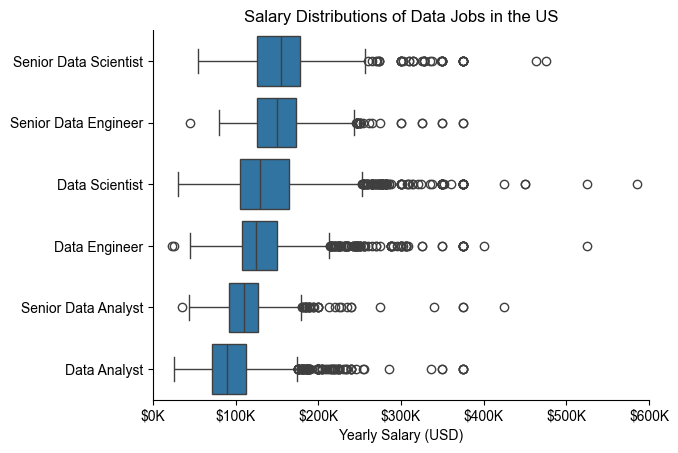

In [13]:


sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()



## Investigate Median Salary vs. Skill for Data Analysts

Filter the original dataset to retain only rows where the job title is 'Data Analyst' and the country is 'United States,' resulting in a new DataFrame, df_DA_US. Remove NaN values from the salary_year_avg column. Use the explode method on the job_skills column to create a new row for each skill associated with a job. Finally, display the first five entries of the salary_year_avg and job_skills columns.

In [14]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [15]:
df_DA_US = df_DA_US.dropna(subset = "salary_year_avg")

In [16]:
df_DA_US = df_DA_US.explode('job_skills')

In [21]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

In [23]:
df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0




Calculates the count and median salary for each skill in df_DA_US. It groups the data by job_skills, aggregates it to find the count and median salary for each skill, and then sorts the results by count in descending order by count. It re-sorts this subset by median salary in descending order.


In [28]:


df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills



,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


Generate two horizontal bar charts:

    -Display the highest-paid skills.
    -Show the most in-demand skills.

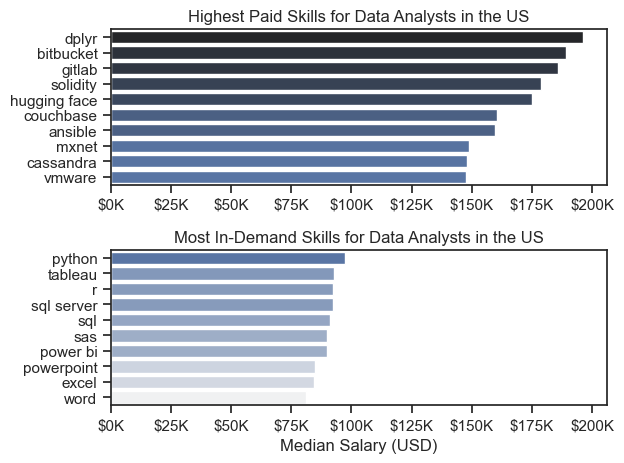

In [29]:


fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in the US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the US')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()

